<a href="https://colab.research.google.com/github/kessmith/NN_RealTime_Detector/blob/main/yolov5_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri May  5 01:23:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Importing necessary Yolov5 packages ande dependencies**

In [2]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15637, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 15637 (delta 123), reused 173 (delta 101), pack-reused 15393
Receiving objects: 100% (15637/15637), 14.65 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (10647/10647), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


# **Importing roboflow packages for dataset importing**

In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [5]:
!pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(model_format="yolov5", notebook="ultralytics")
rf = Roboflow(api_key="T2oNsglLK7hupVVcW8ds")
project = rf.workspace("thesis-dubwt").project("thesis-data-4bu5t")
dataset = project.version(5).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Thesis-Data-5 in yolov5pytorch:: 100%|██████████| 2068/2068 [00:00<00:00, 2951.57it/s]


# **Training our dataset**
- **Parameters:** 100 Epochs, 416 image size, batches of 16

In [6]:
!python train.py --img 416 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Thesis-Data-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

# Display Training Results in Visual Format

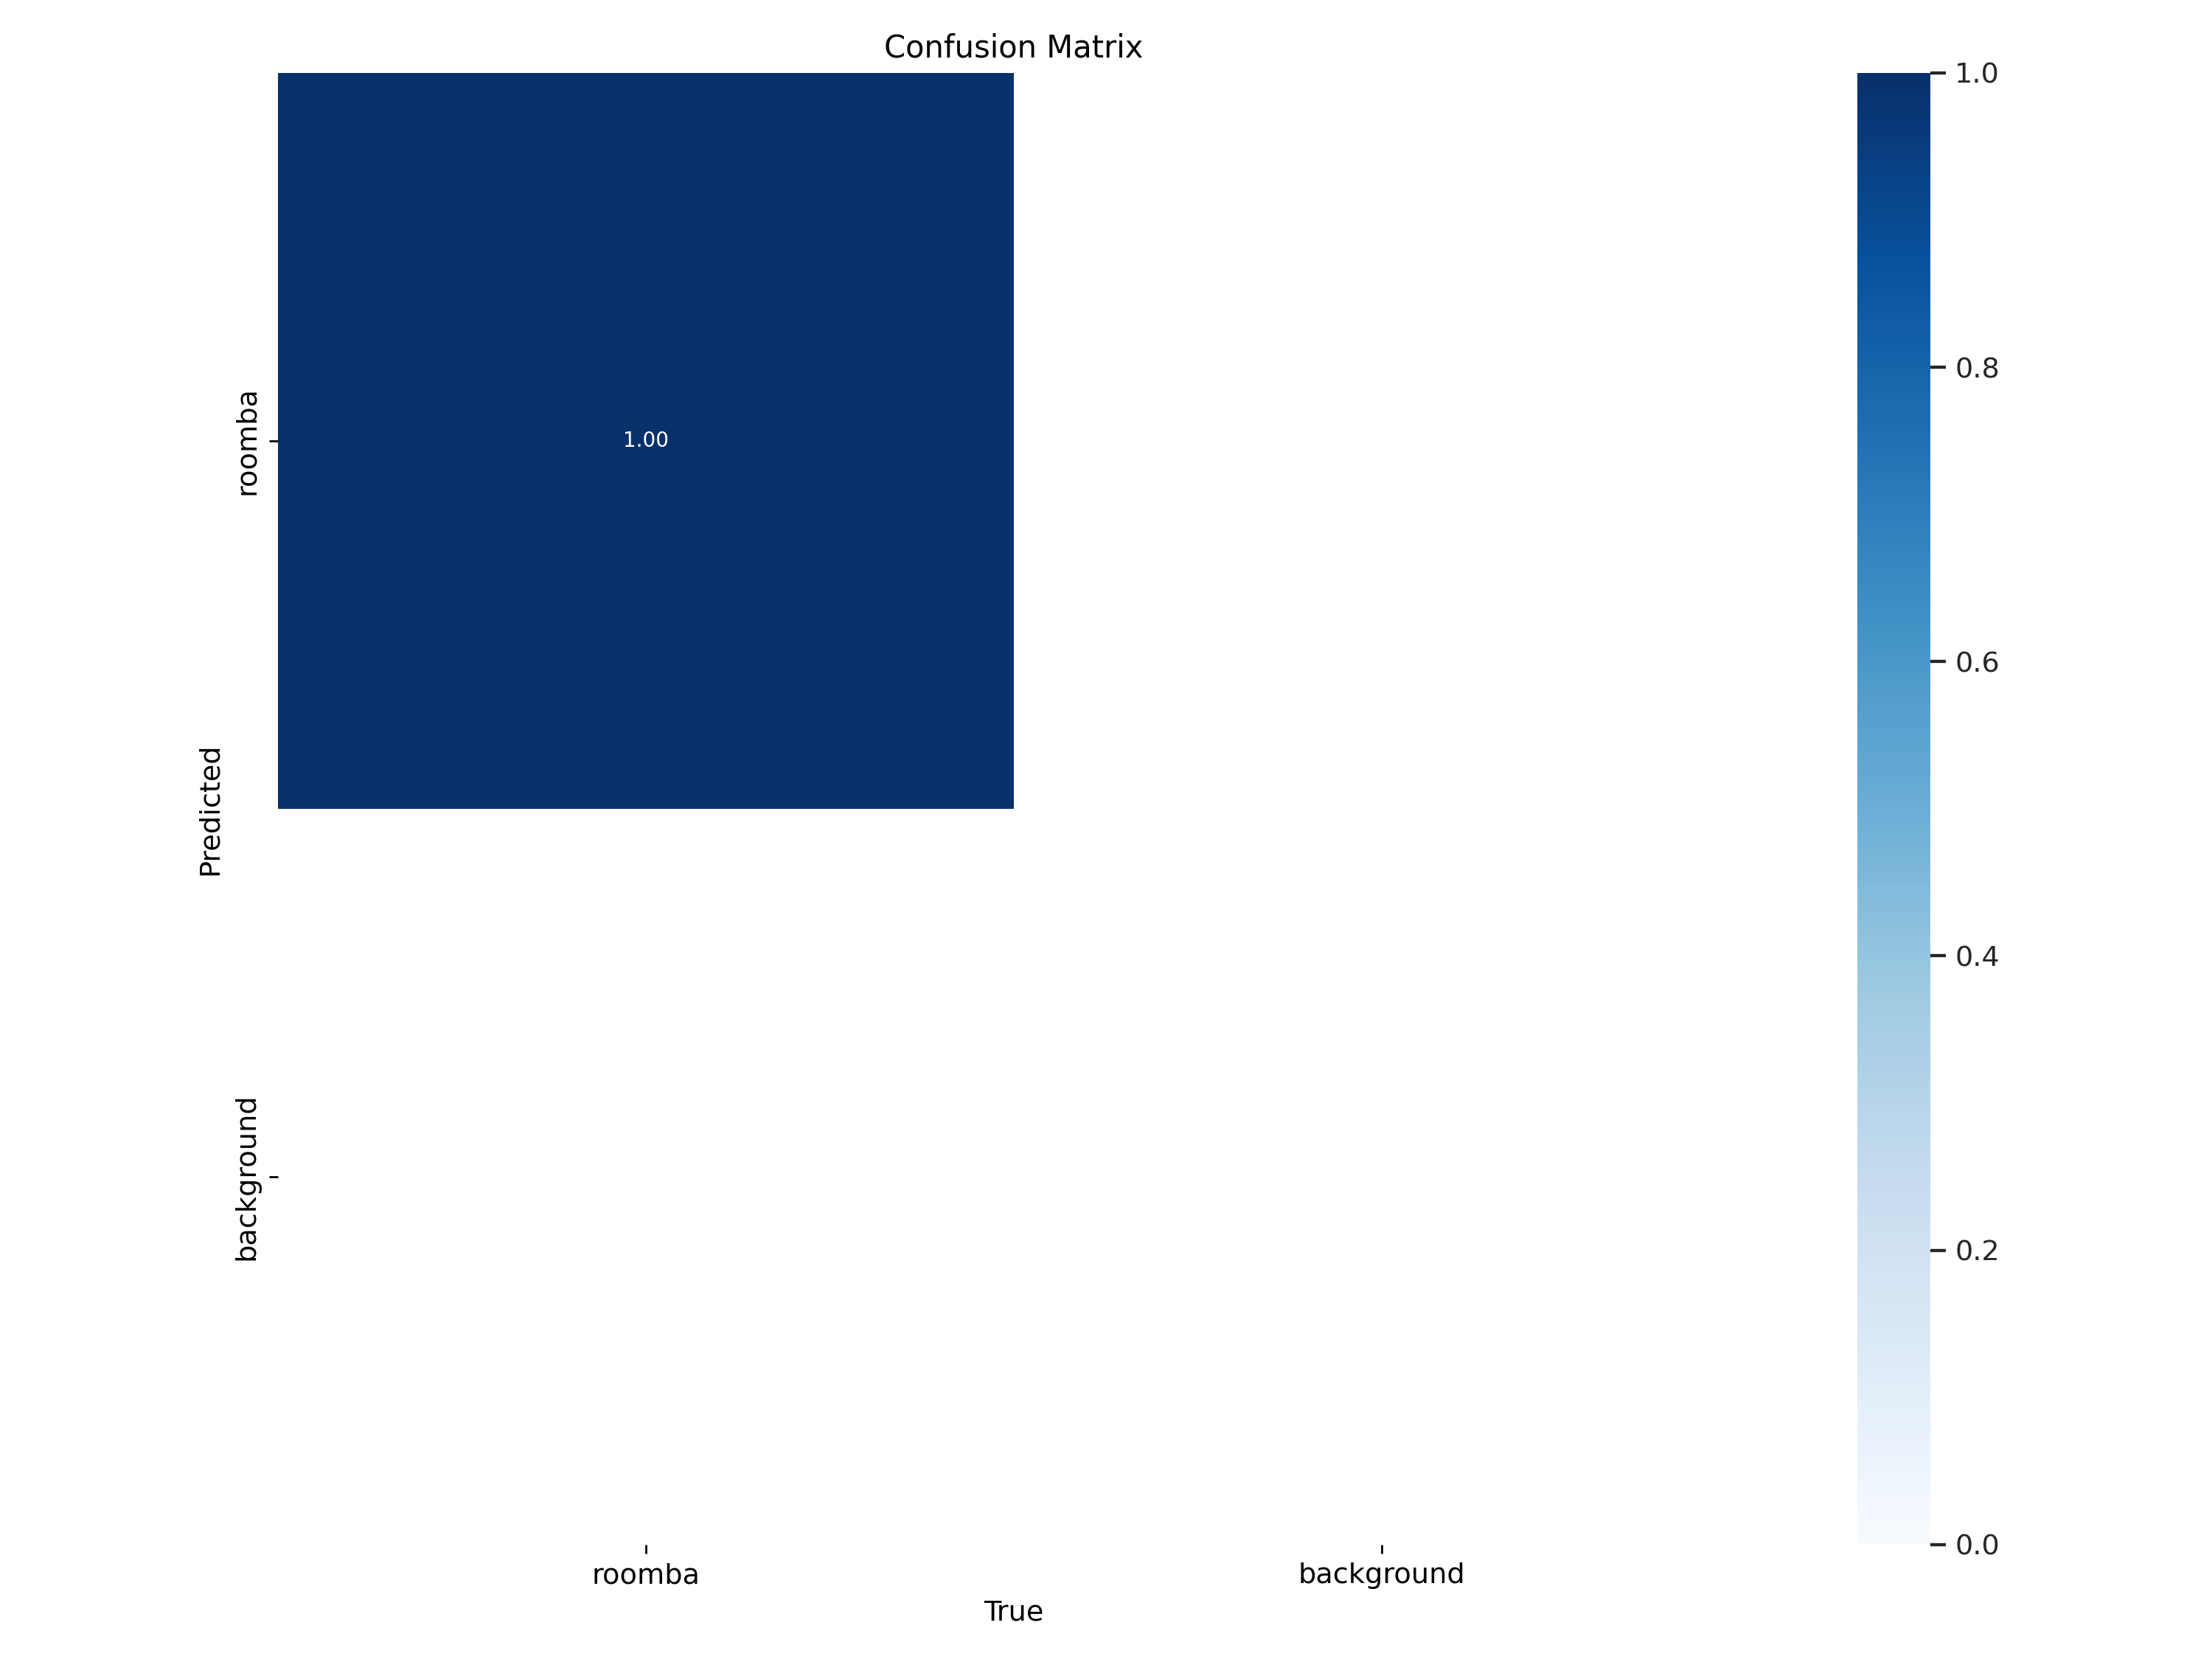

In [7]:
Image(filename=f'/content/yolov5/runs/train/exp/confusion_matrix.png', width=600)

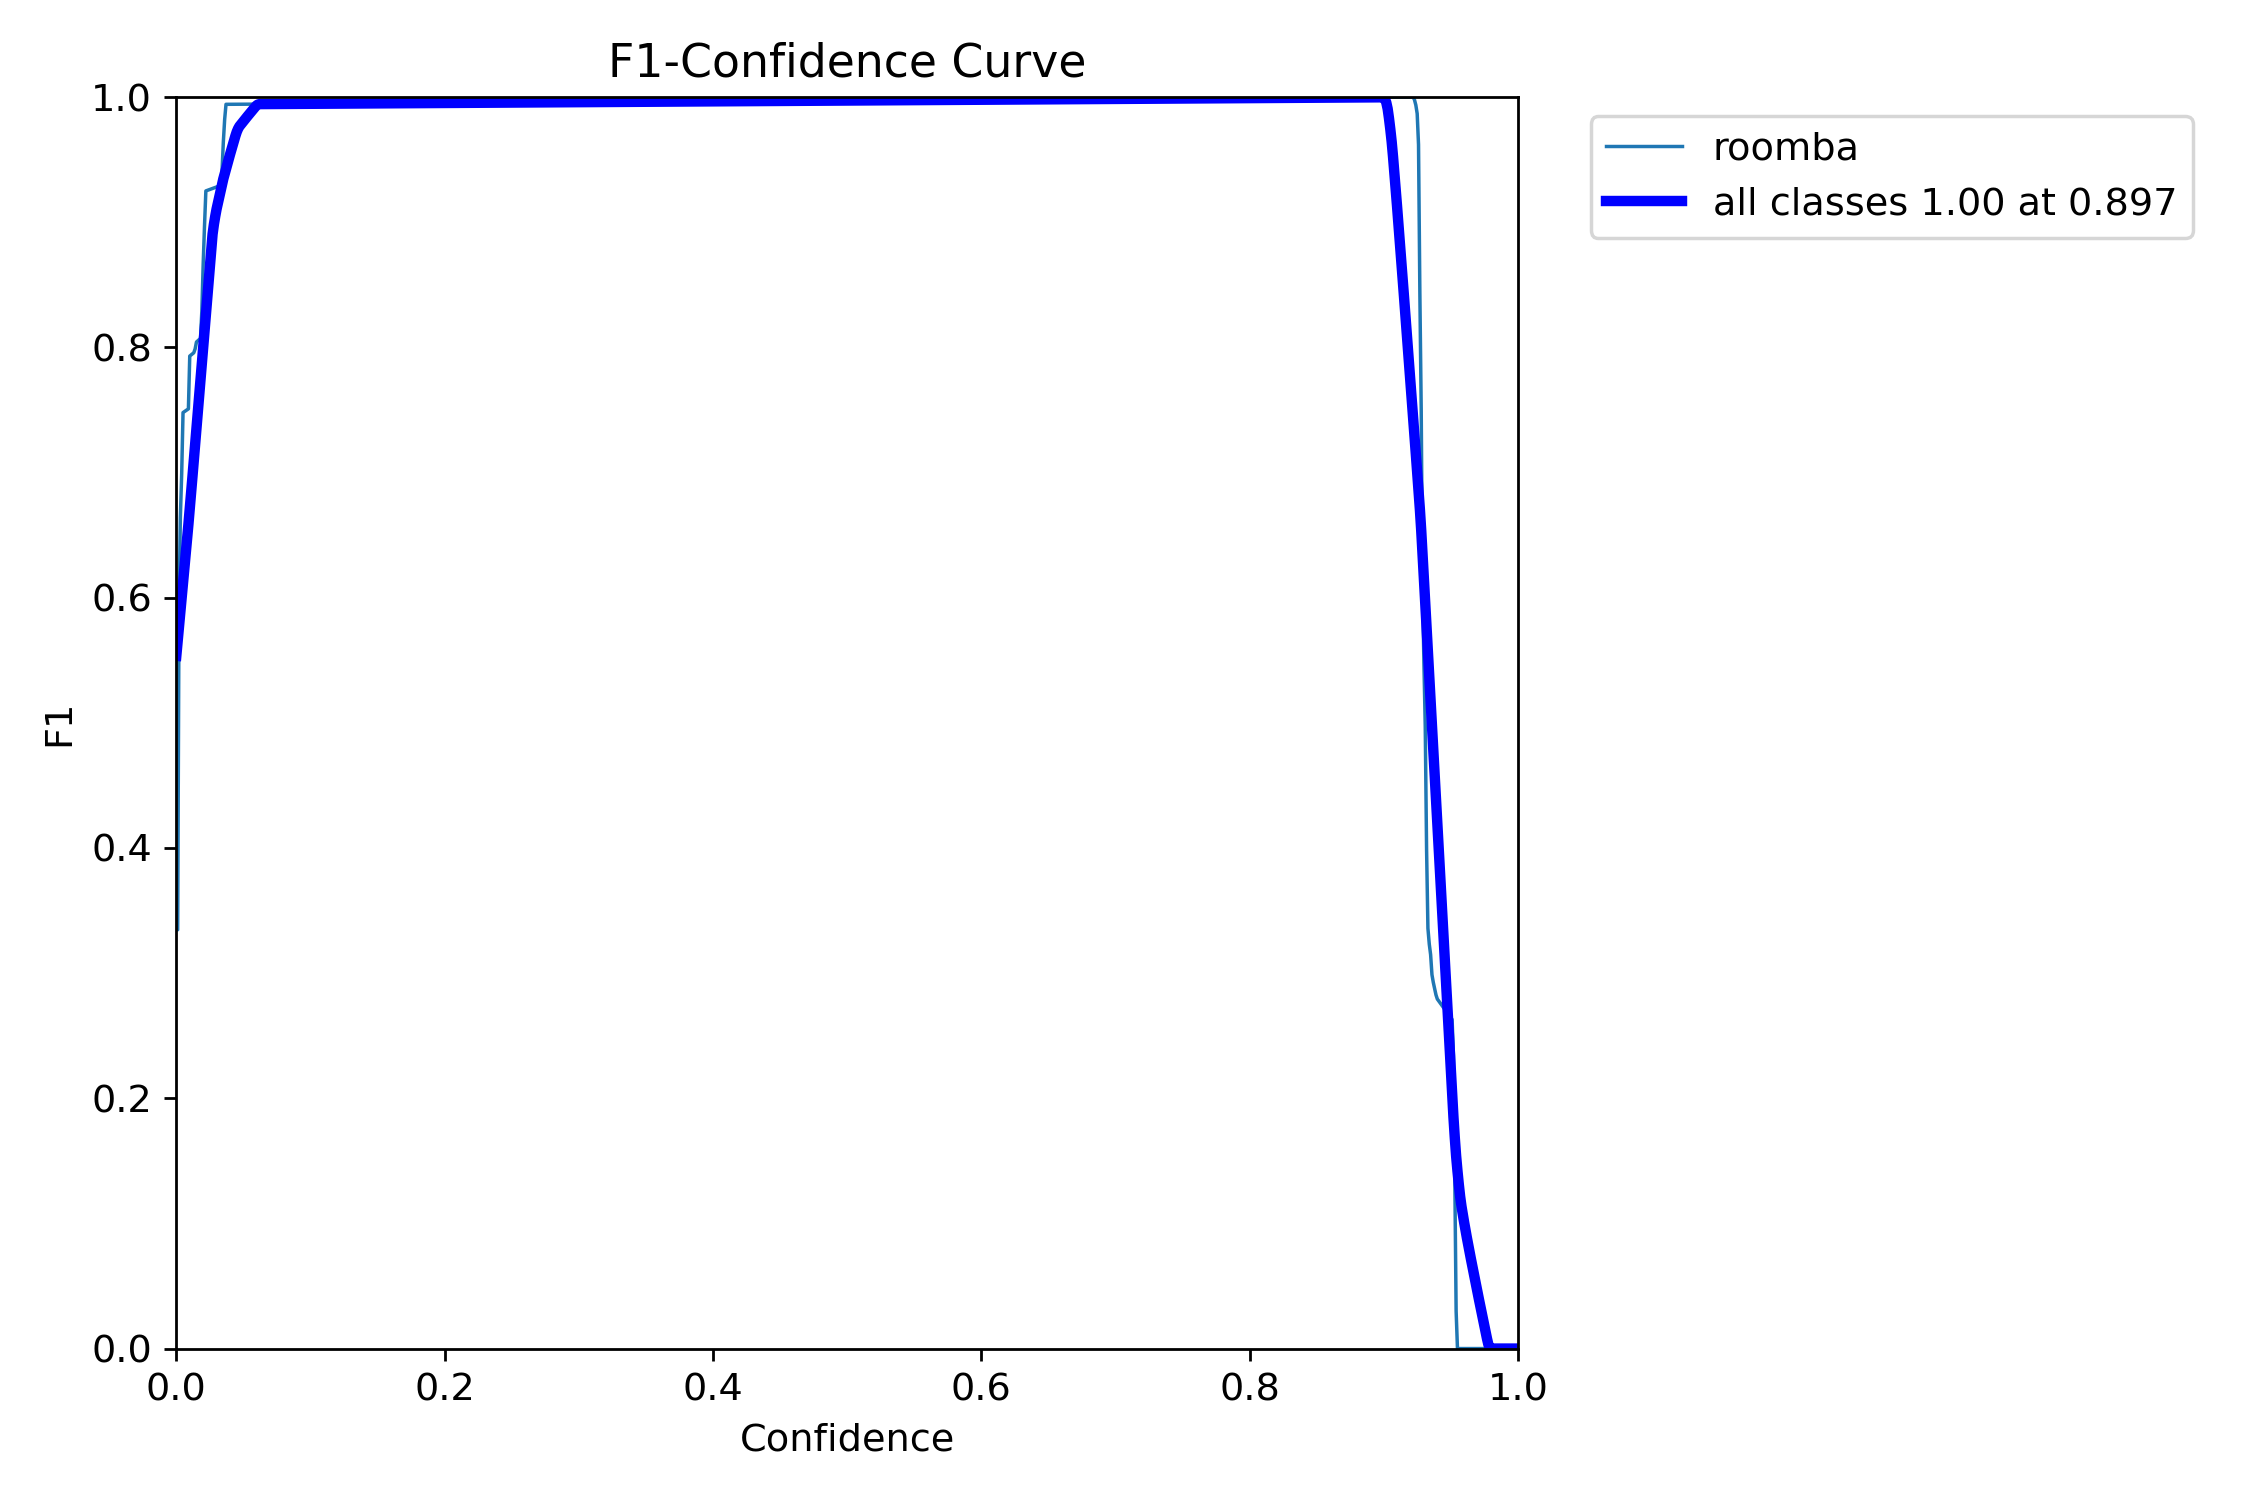

In [8]:
Image(filename=f'/content/yolov5/runs/train/exp/F1_curve.png', width=600)

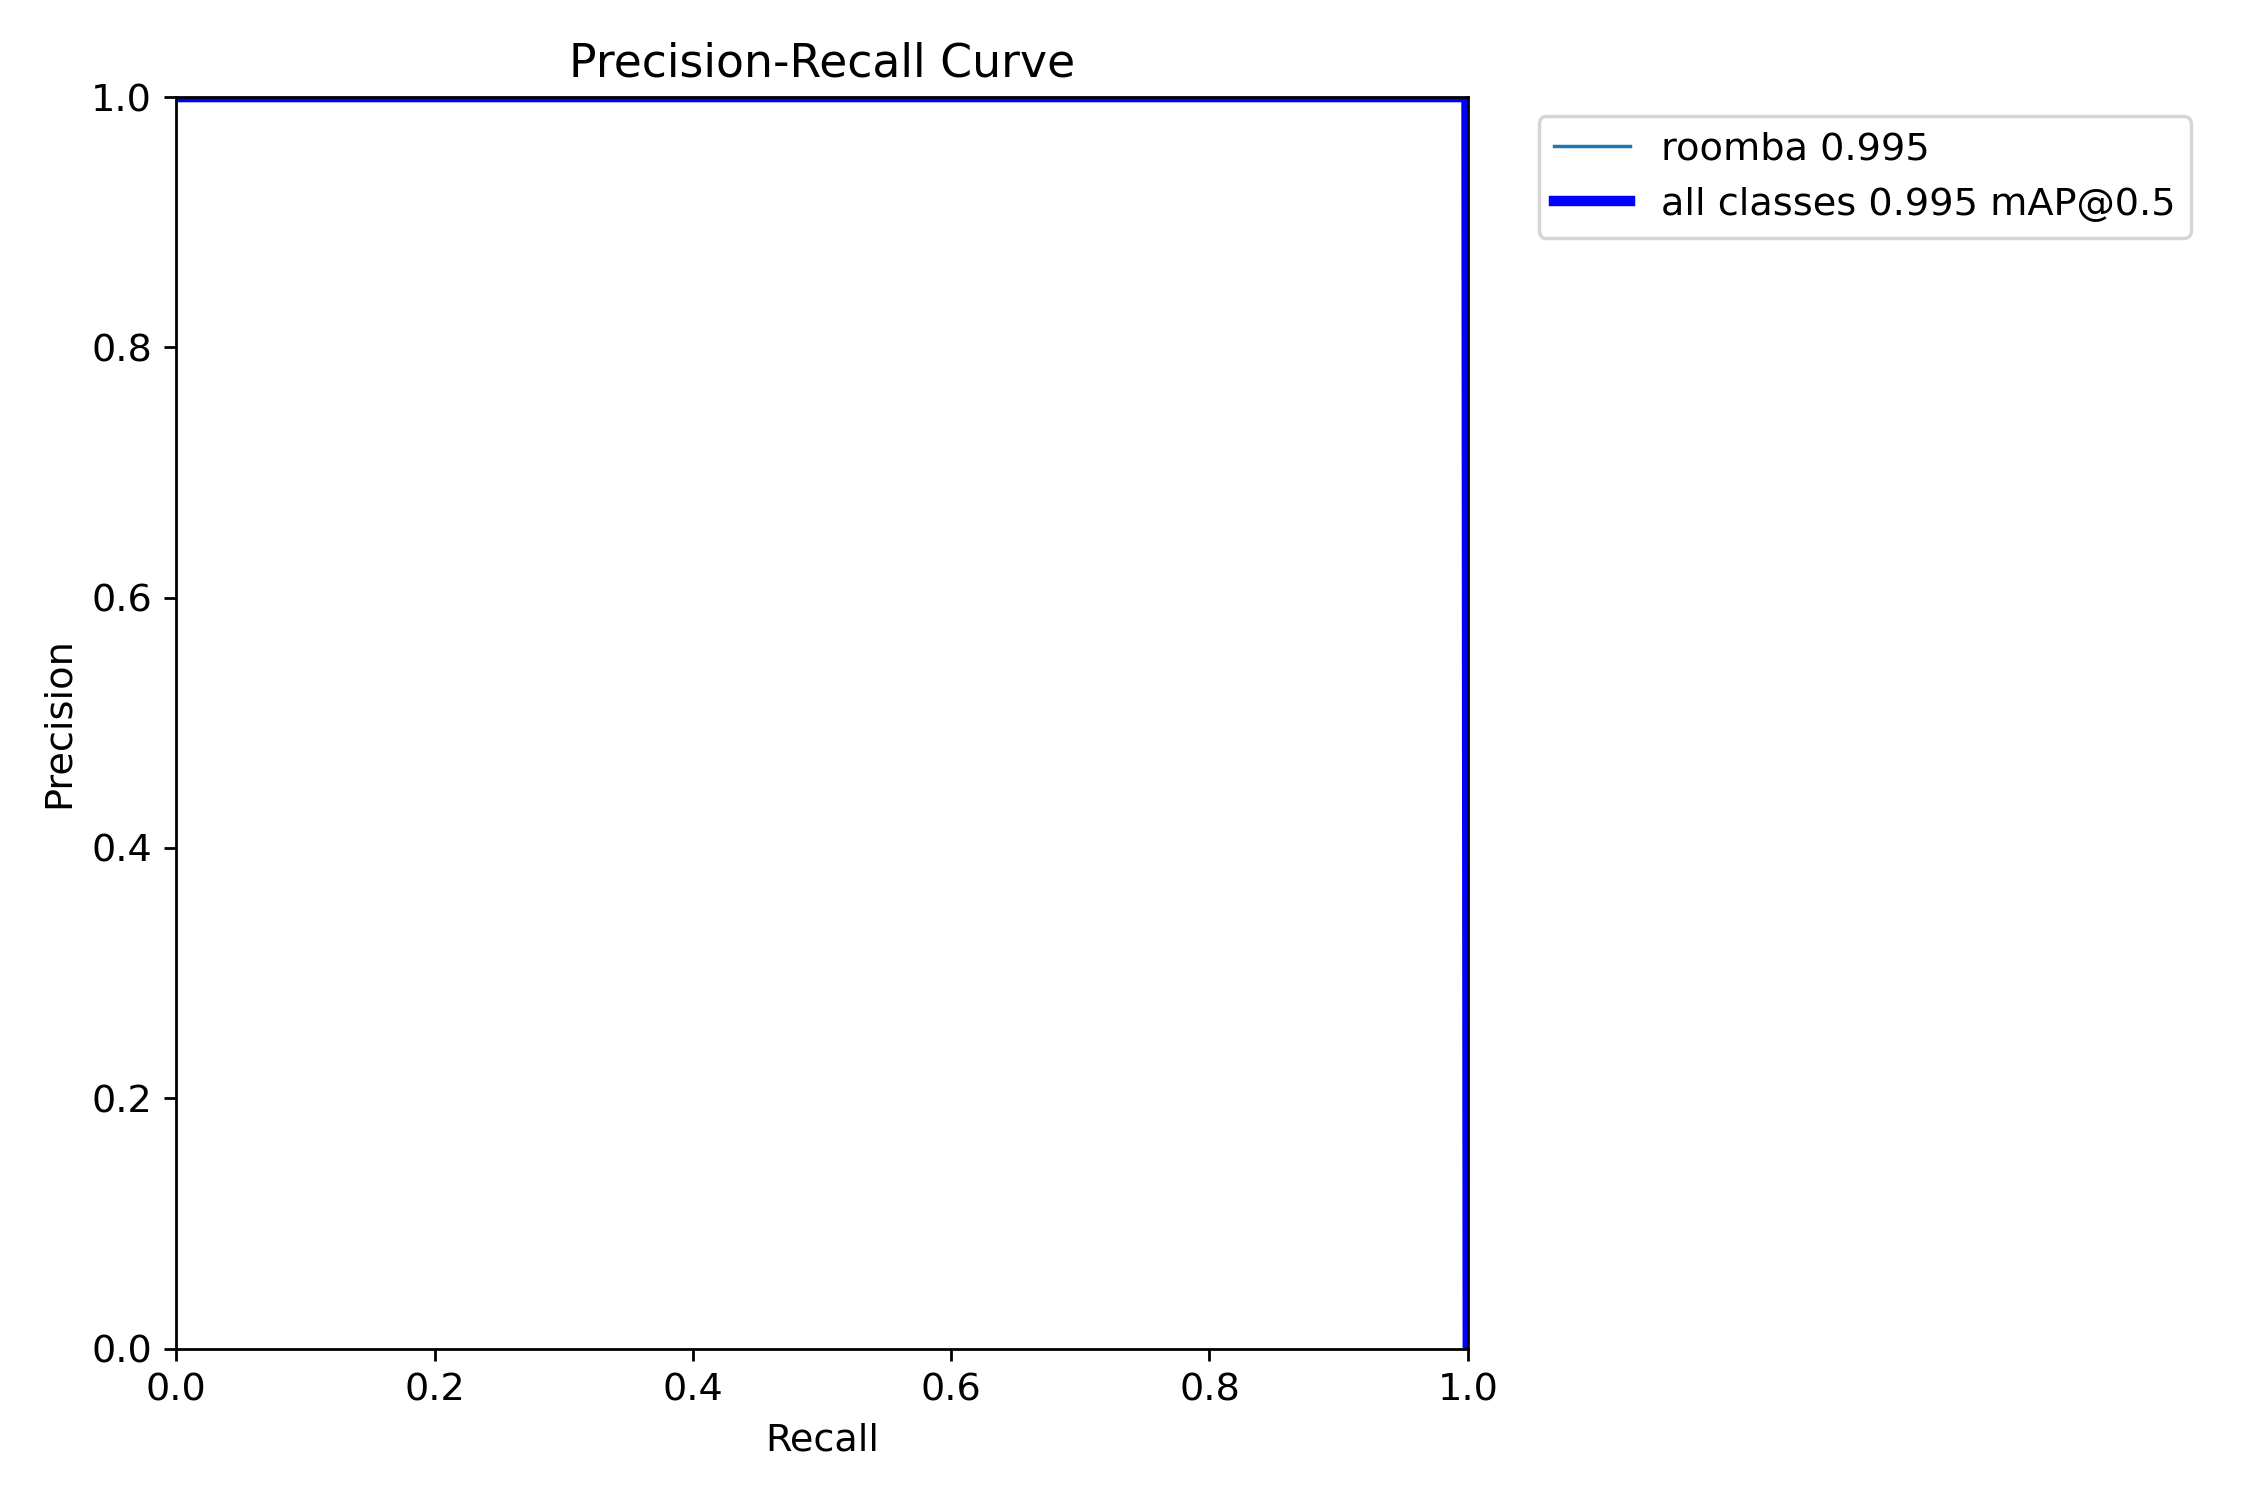

In [9]:
Image(filename=f'/content/yolov5/runs/train/exp/PR_curve.png', width=600)

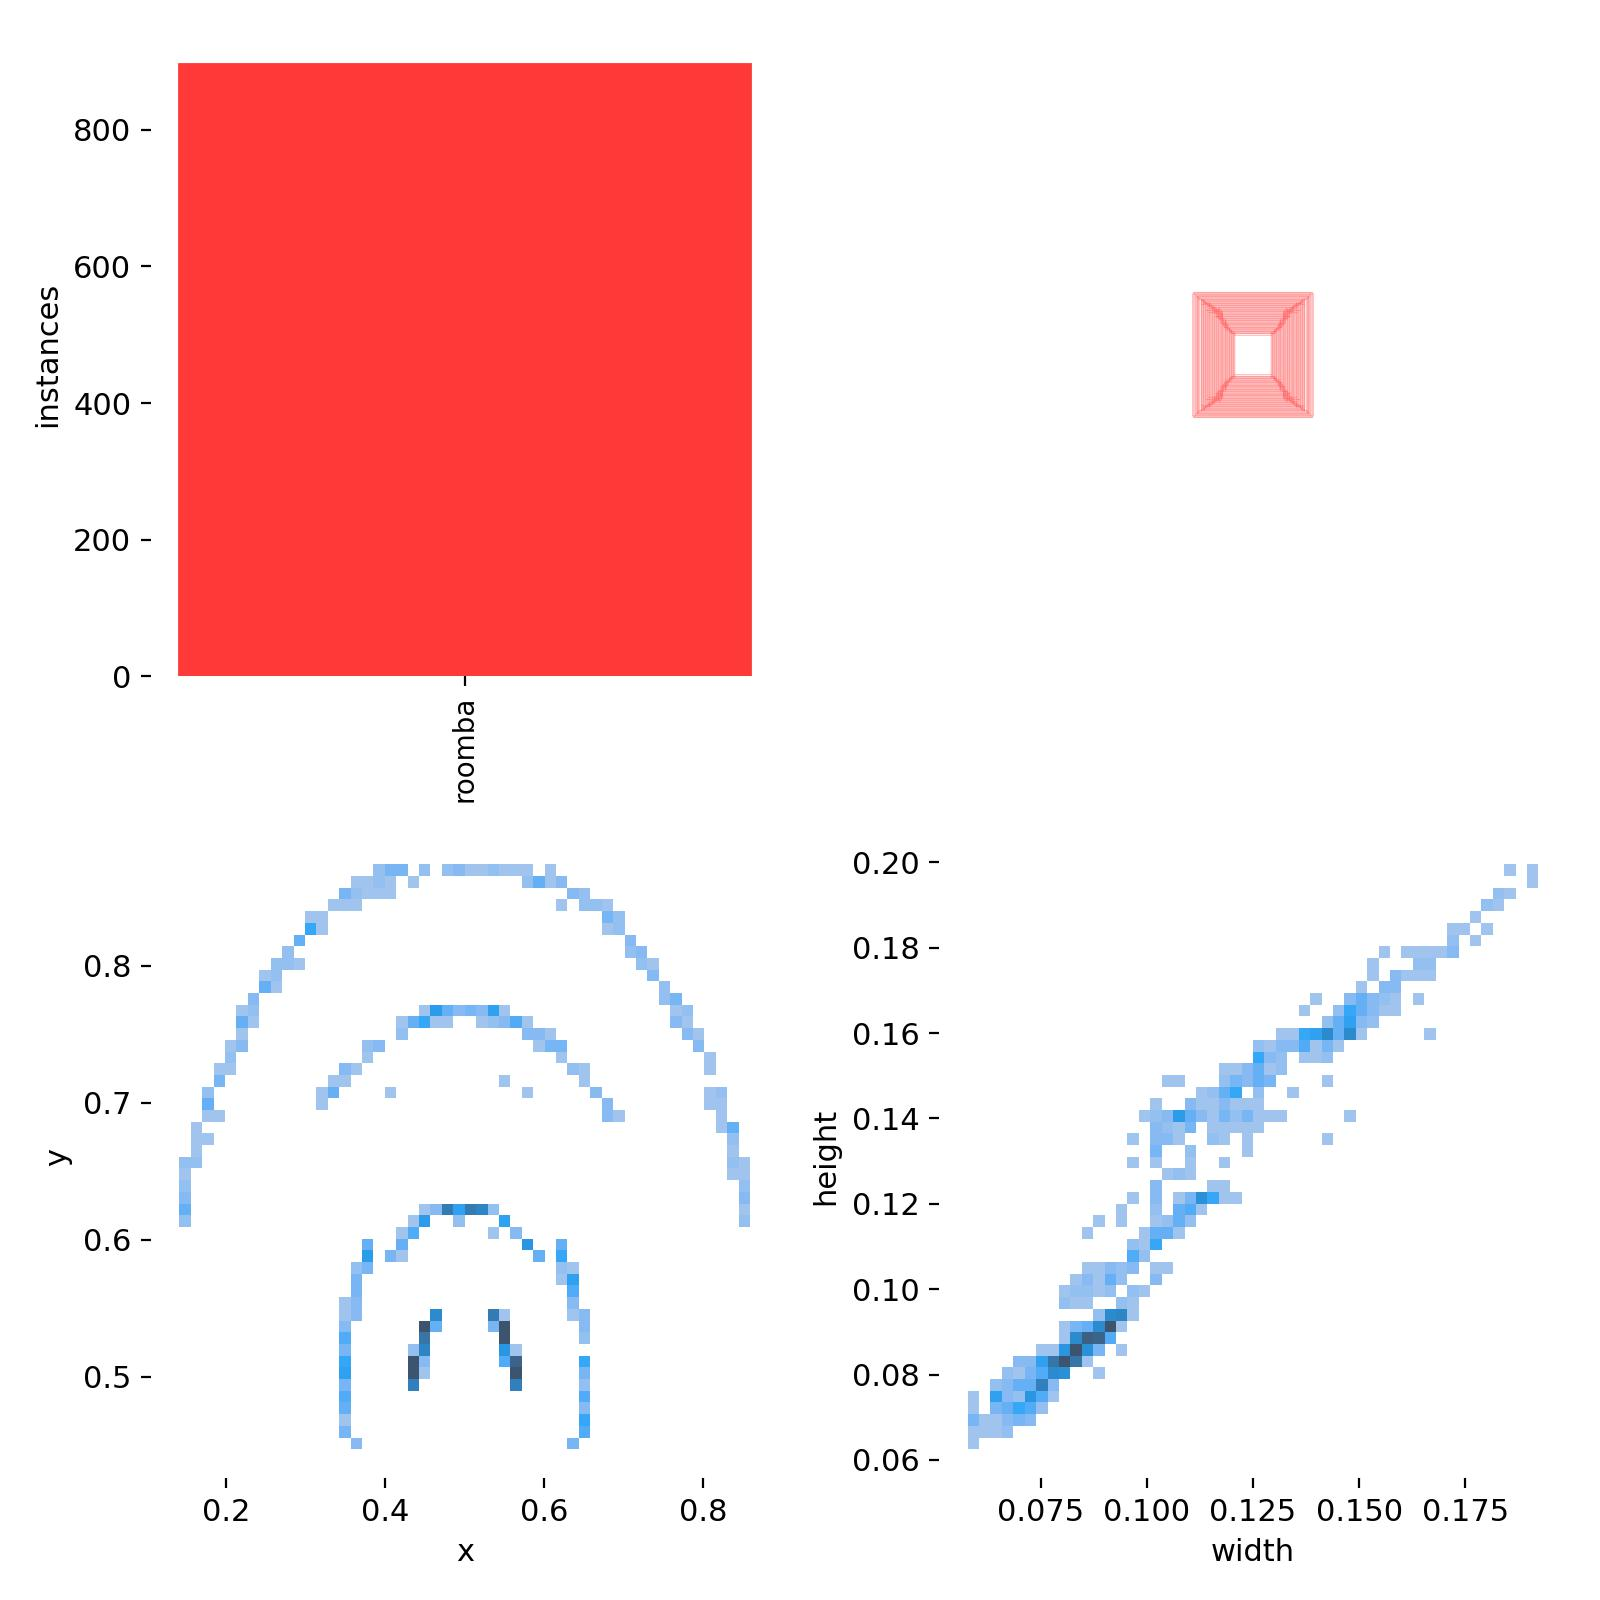

In [10]:
Image(filename=f'/content/yolov5/runs/train/exp/labels.jpg', width=600)

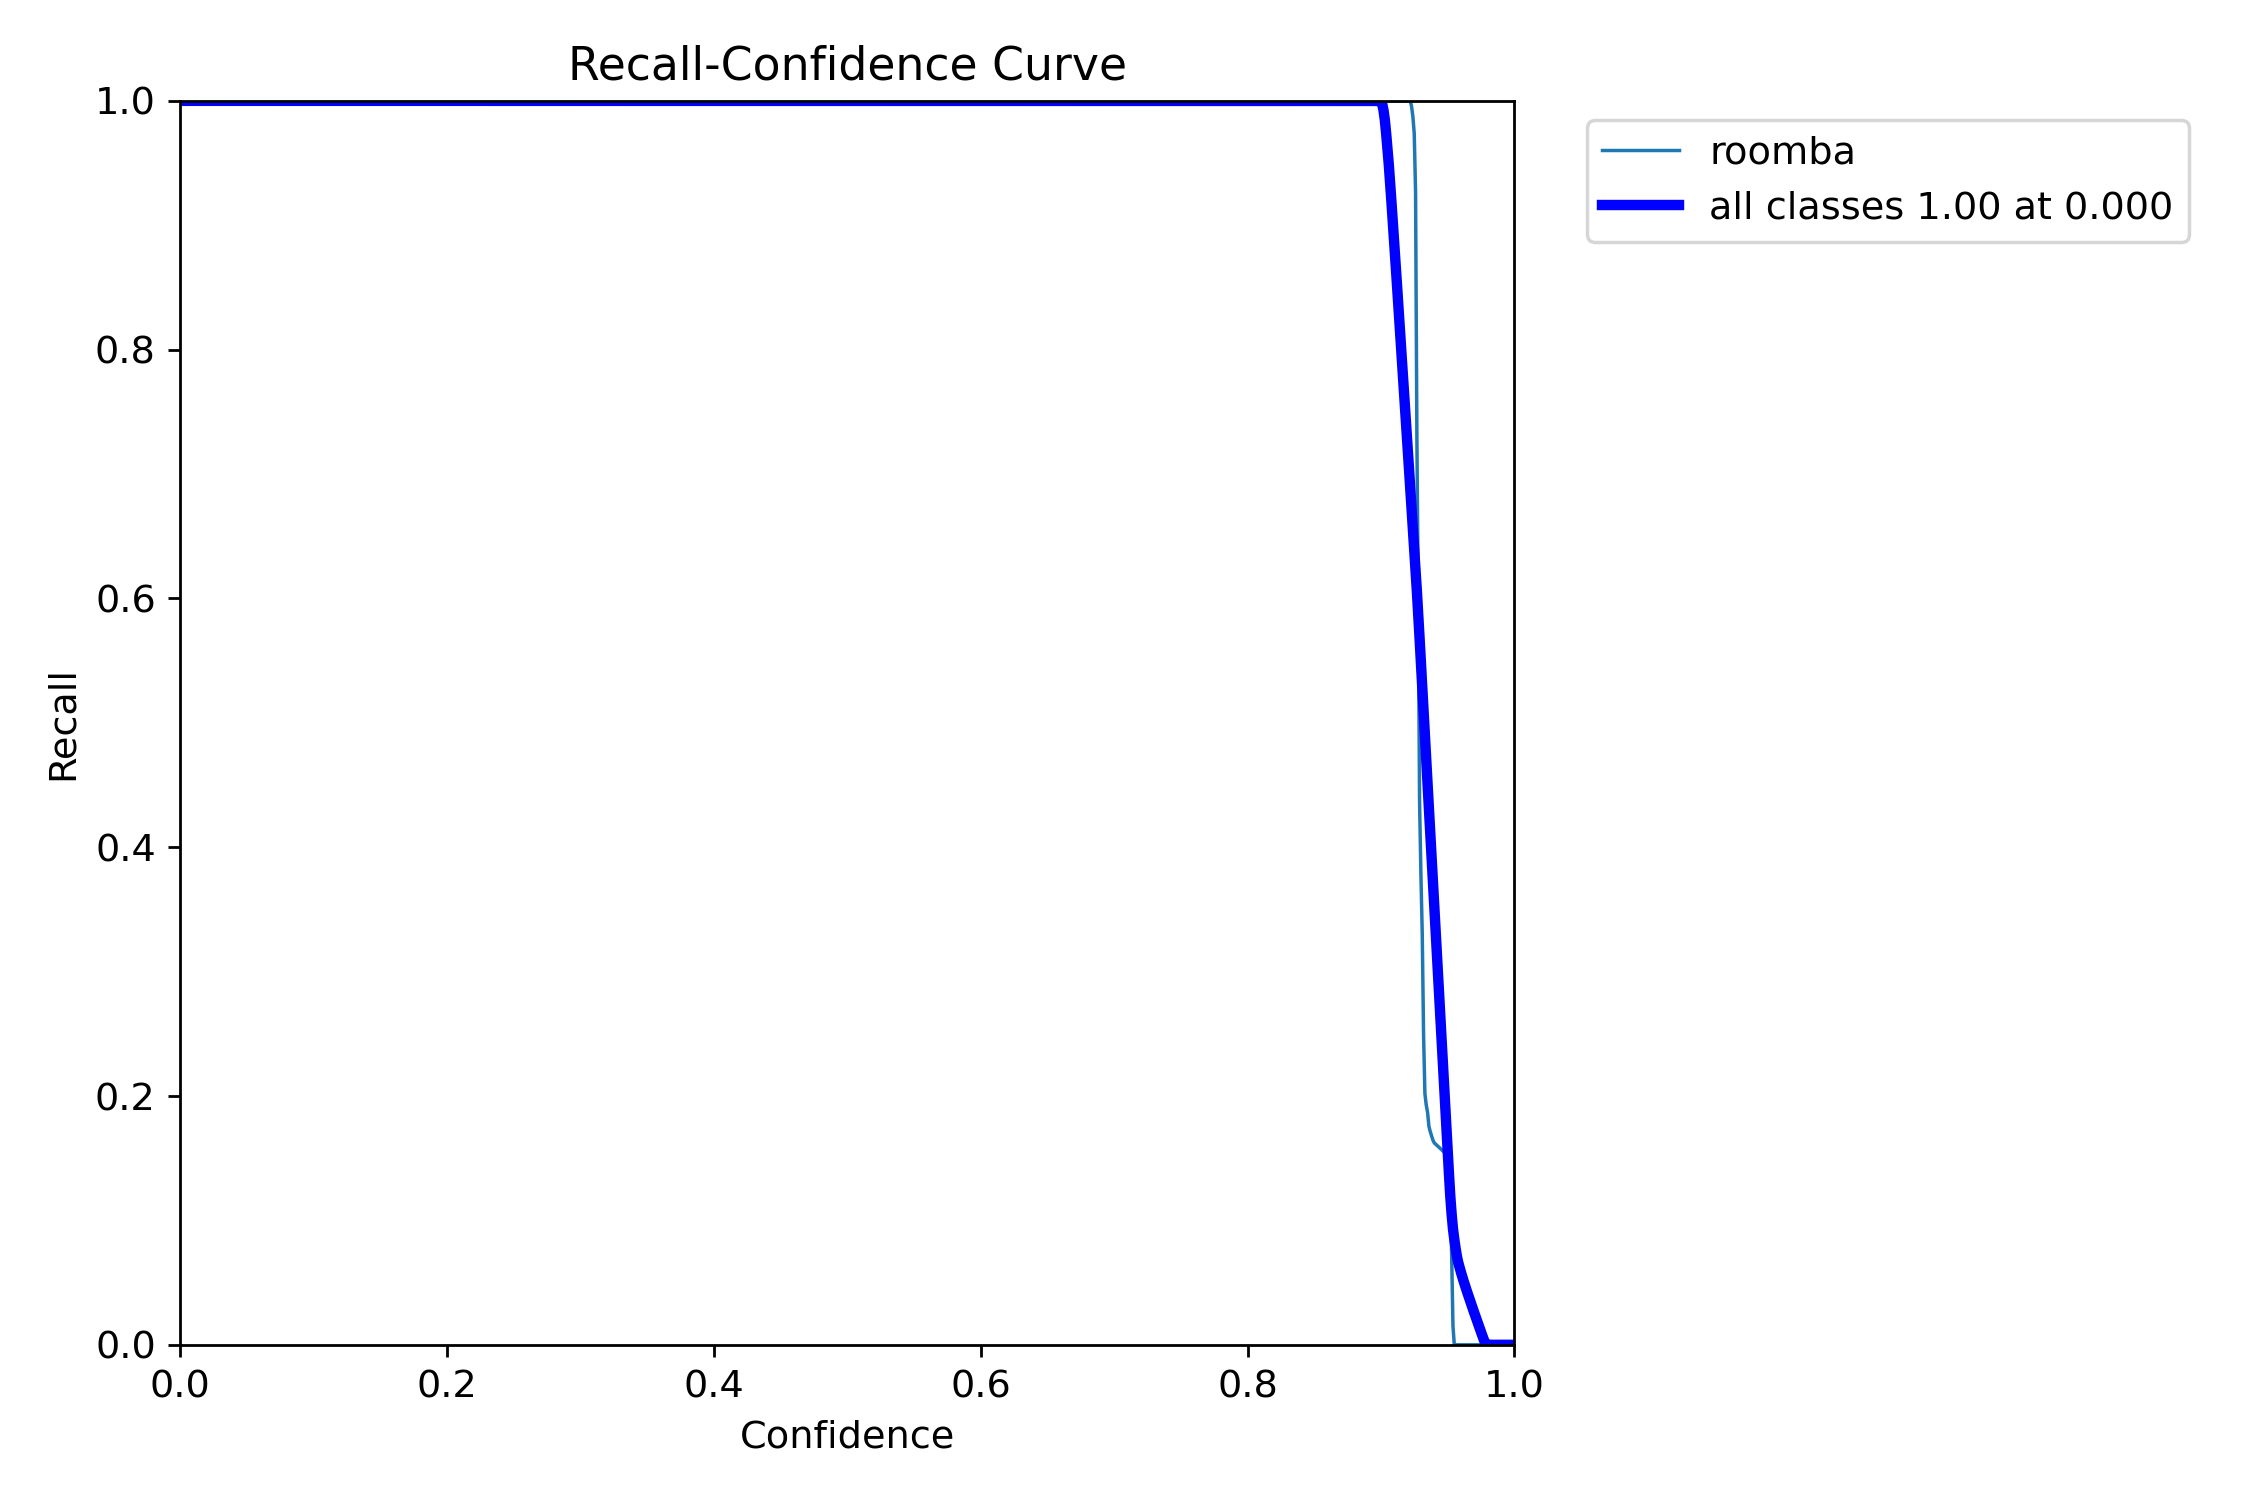

In [11]:
Image(filename=f'/content/yolov5/runs/train/exp/R_curve.png', width=600)

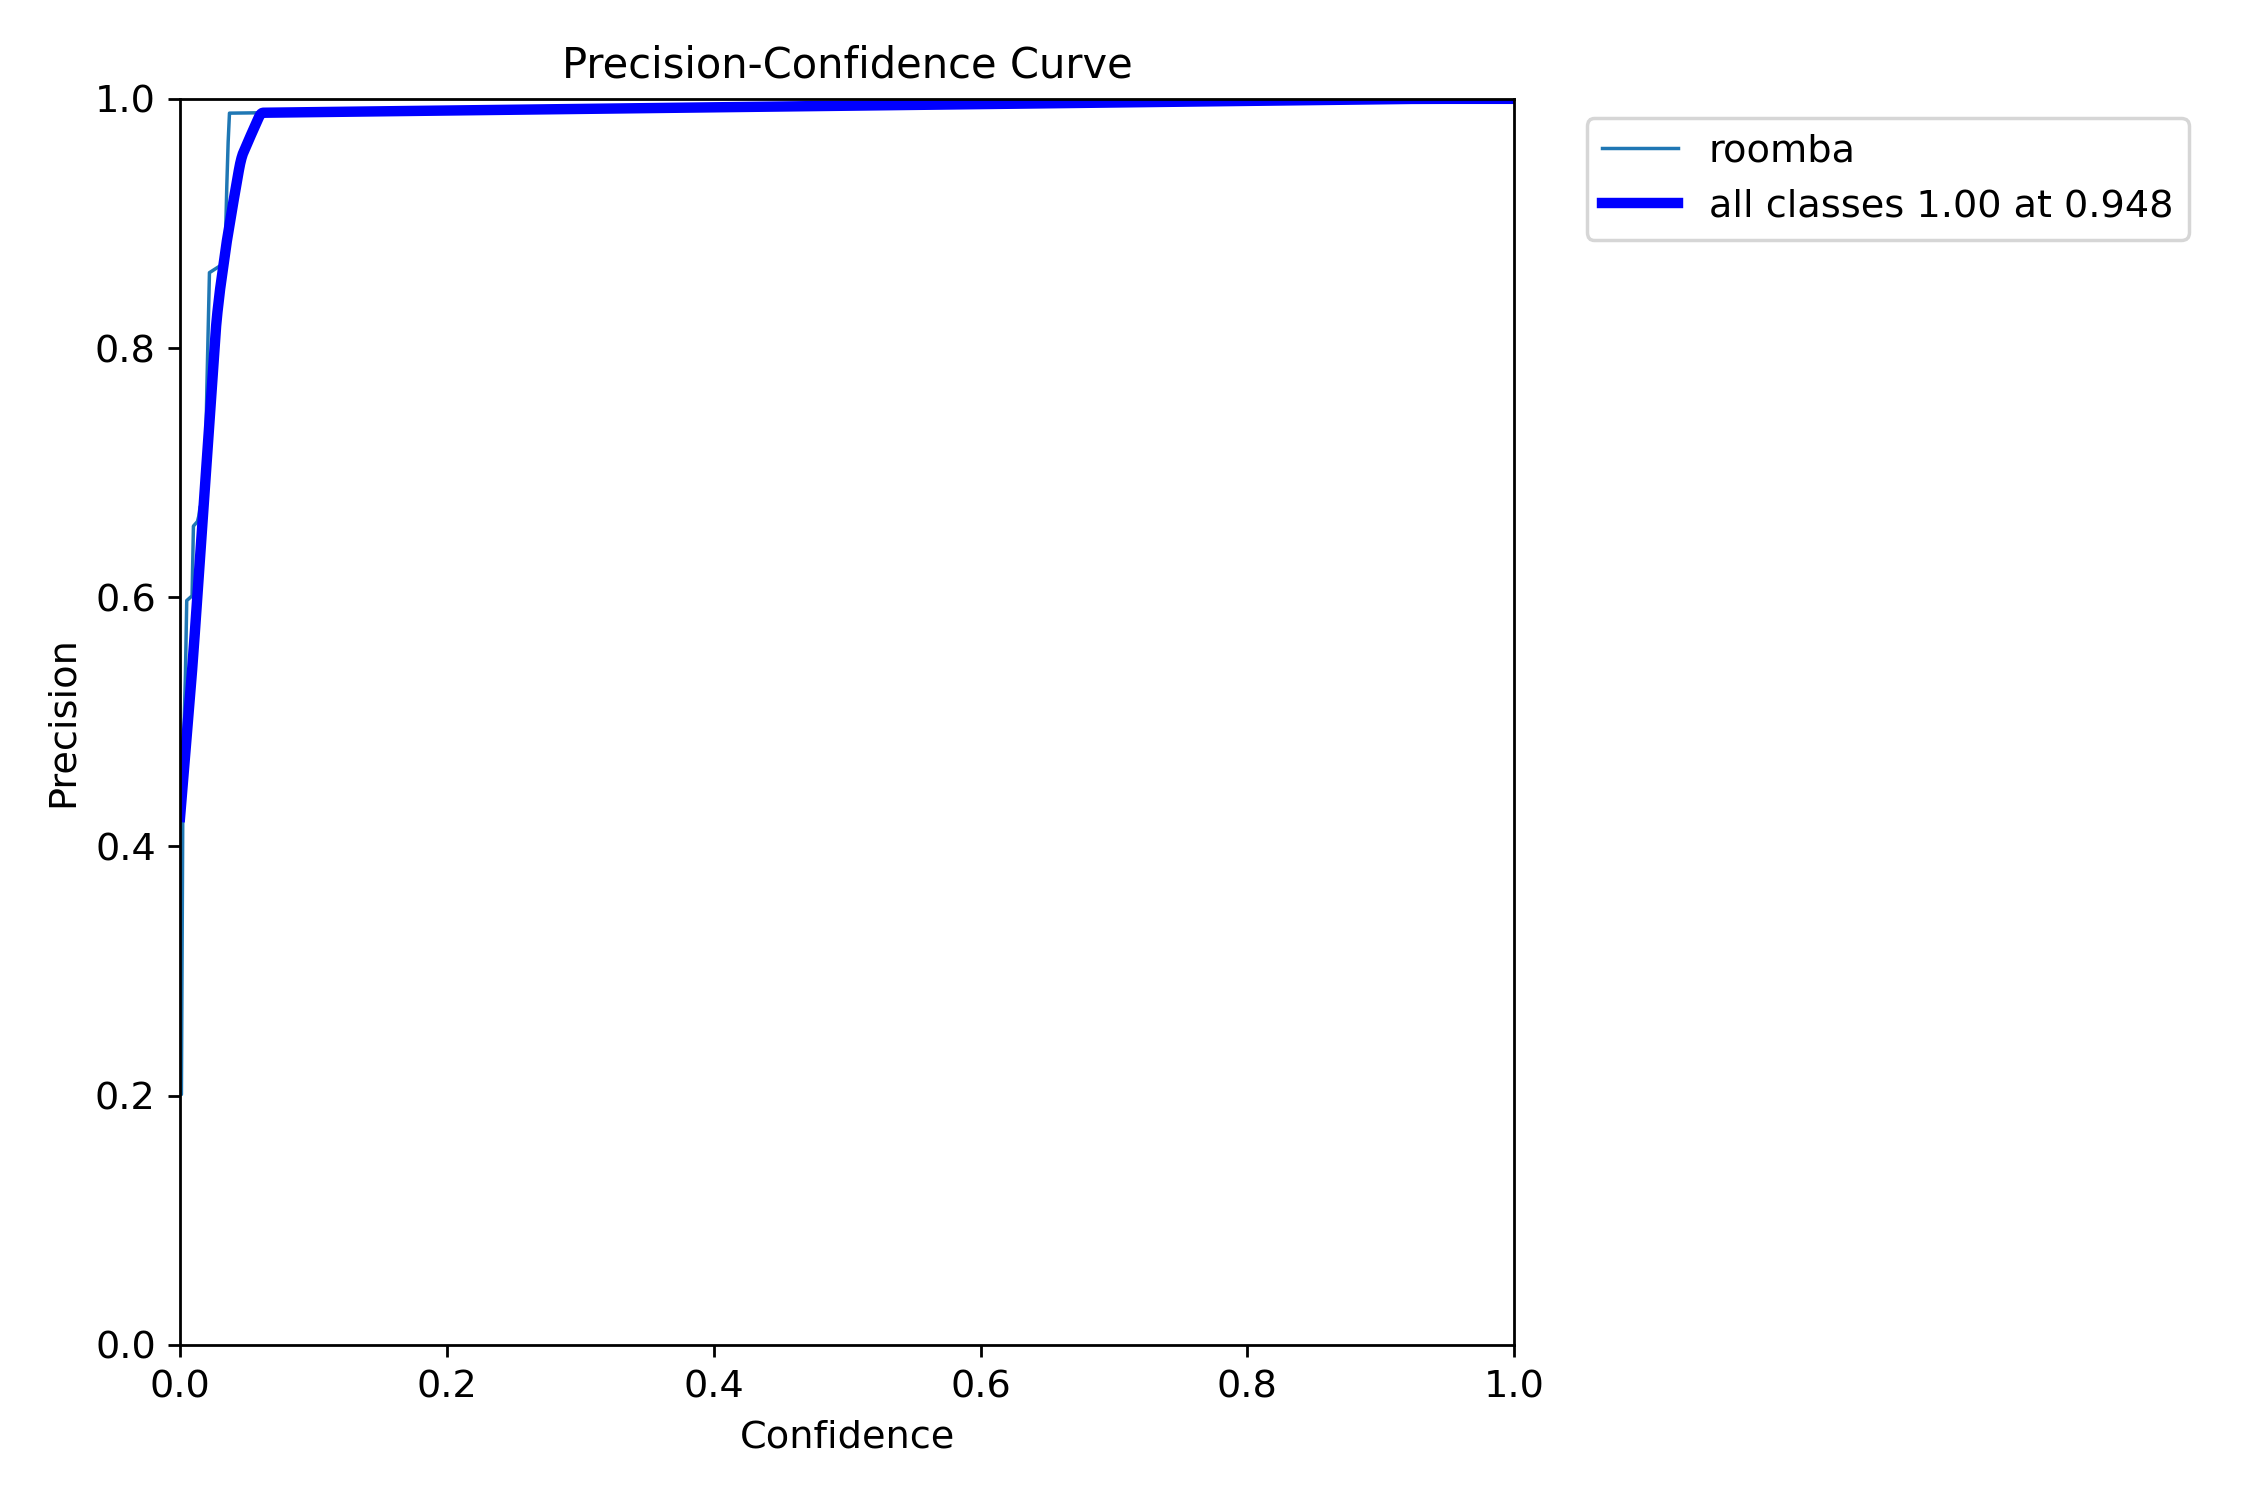

In [12]:
Image(filename=f'/content/yolov5/runs/train/exp/P_curve.png', width=600)

# Running the best model version against test images

In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Thesis-Data-5/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/86 /content/datasets/Thesis-Data-5/valid/images/image_01682641120-202038_jpg.rf.504c0d8bb8d94354fcf1e539b2de4509.jpg: 416x416 1 roomba, 7.4ms
image 2/86 /content/datasets/Thesis-Data-5/valid/images/image_01682641120-8922539_jpg.rf.71073d83f713d13657

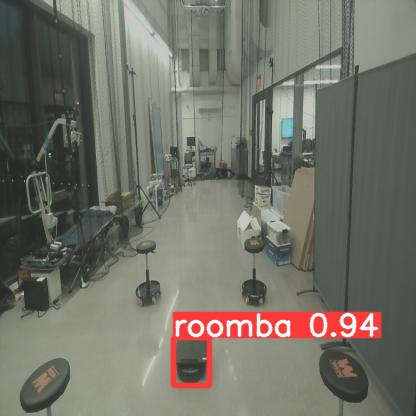

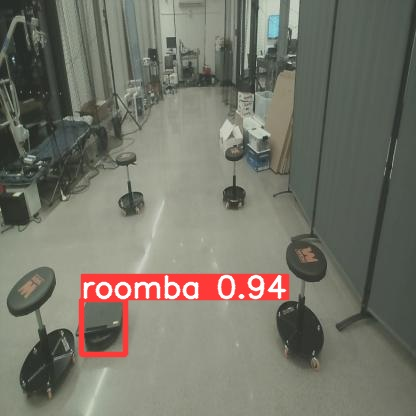

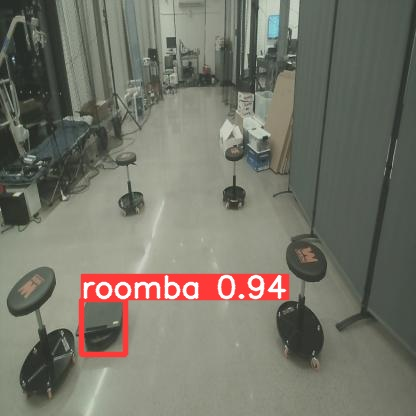

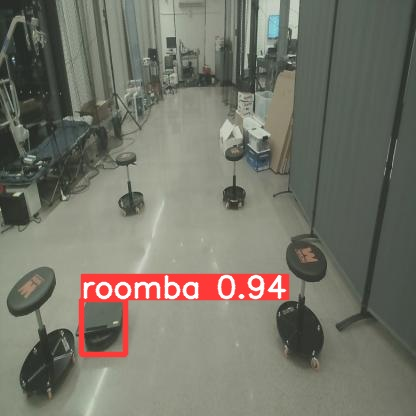

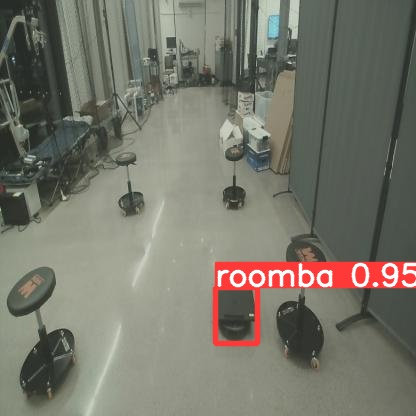

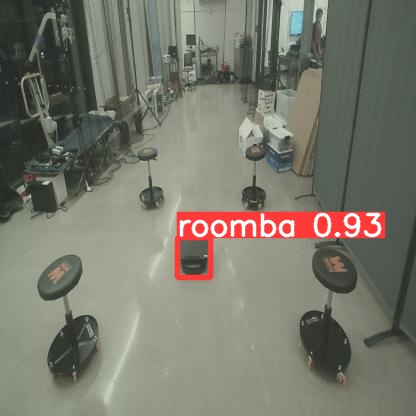

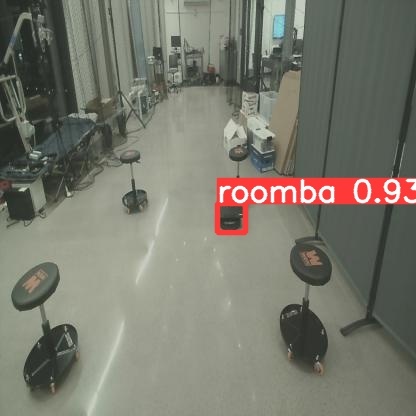

In [14]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:15]:
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

# Export Import Files from Training

In [15]:
from google.colab import files

files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# files.download('/content/yolov5/runs/detect/exp/0_1914_1668876768-4637387_png.rf.6f1302d63305f2e36d1dafb75d173886.jpg')
# files.download('/content/yolov5/runs/detect/exp/1000_1891_1668876802-6343_png.rf.59ba062f5ca100358fb041c0482870a8.jpg')
# files.download('/content/yolov5/runs/detect/exp/1000_2127_1668877907-3802836_png.rf.5234bf804feedb3af0ad70bae89fe7c9.jpg')
# files.download('/content/yolov5/runs/detect/exp/100_1486_1668877116-832912_png.rf.780172598adc96df9af43e0c1db1457f.jpg')
# files.download('/content/yolov5/runs/detect/exp/100_2169_1668877877-3656373_png.rf.361bddef16648c8b15eedc116178415a.jpg')
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  print(imageName)
  files.download(imageName)

/content/yolov5/runs/detect/exp/image_01682641120-8922539_jpg.rf.71073d83f713d136579209bb5d746bb4.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641469-616173_jpg.rf.34d21f0619142775a71ab77a75befd91.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641467-2749288_jpg.rf.9cef816eb2bb3c75c37b8df4779212b7.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641443-945817_jpg.rf.88d42dbf83e029ce4f0bf55f6ec09c72.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641402-715081_jpg.rf.b16c49d3867bdf1443c4735fab51f922.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641135-545759_jpg.rf.e0b1f916d52b0c35650cb9a352c381e6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641683-0694962_jpg.rf.4f466485bb8c76ab79698a8f0bf8ddd5.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641409-0509288_jpg.rf.ca34008c02b002474e9f4fba2e6f3ba1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641697-75389_jpg.rf.514ceee627e8f59f1b003e0b49585c2e.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641458-6280131_jpg.rf.04e6522c20d6693b7027d083b3a823a8.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641676-7331939_jpg.rf.7fe0b8a0c80bea8a634b61e9b0ec50ae.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641710-754454_jpg.rf.9db75635fcae6b20b608d32afe8ebafe.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641396-0472581_jpg.rf.0e703ffa996427dcff83f18d56befbbb.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641679-4042912_jpg.rf.5140dff52038710d5ddeba327e247938.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641523-494795_jpg.rf.98dd5f71abd99c1c0544f064ea3d5e20.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641681-717345_jpg.rf.9c038a72376314467f3a30af8c2213c6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641409-7102761_jpg.rf.6f0f7315f6aed058c058a7ca5667c548.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641124-5591528_jpg.rf.2d9a893454c18736827660733e4e3eb6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641456-977432_jpg.rf.aba1091e16175c9f1fce8d1bc6b890e4.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641460-2794318_jpg.rf.73b5aad93200bcdcb050e8a8e98a4646.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641498-151117_jpg.rf.d2768c85bd6f55164f67f2a7cefc8215.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641400-7015738_jpg.rf.45fde307b6d2afd9884a94af39d09069.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641462-291801_jpg.rf.38491b6bce87fb46acfbfba310f4cfa9.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641706-399728_jpg.rf.cd76afbd9d56e042c56a1aedbbdeb34e.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641126-2072709_jpg.rf.0be86822690d9070f488eeed57ee48b2.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641681-3843331_jpg.rf.4f2779bbc1d5db47861695f0fbf019d1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641134-8846872_jpg.rf.3d313ad45f3b6f22d46f5ccbd4233344.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641510-461024_jpg.rf.36e3a27f72bca26defe37677e612d31a.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641401-7256792_jpg.rf.98cd48cc1a5b617e7eccd9690c66d171.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641139-243437_jpg.rf.908b1acf95e8f9f5dc950d93f2729248.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641514-851263_jpg.rf.afd632d6bf3e654623b1a120139ebe47.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641714-08652_jpg.rf.b43ab7e372ae46818b12410b124d9b19.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641525-145549_jpg.rf.fc4cf45463293ebf01f3b70a32214601.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641413-40695_jpg.rf.22a03899fc44389050742c438a0e6c54.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641713-394441_jpg.rf.0882b638a9dccf93372f0b53dda916b0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641125-545963_jpg.rf.2b0947a42755e912718e296551234e13.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641125-2175941_jpg.rf.a7d4030945008a549aedb4ac9ac79556.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641684-71732_jpg.rf.4b688e4a951d945ee97a0c661a1c93cf.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641404-694635_jpg.rf.4852b191d50523df1b23d8fca23f2684.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641120-202038_jpg.rf.504c0d8bb8d94354fcf1e539b2de4509.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641692-0765781_jpg.rf.7451e0e7038589ef76fc18cfdb629465.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641456-284916_jpg.rf.4cc82a5e22938d2a5a6a59e02a953e32.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641679-073934_jpg.rf.3558a0c3d3b52645e739a6f9b5ec8bef.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641461-960641_jpg.rf.ef9f03bb11442ea0749166b24a765e26.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641403-0442061_jpg.rf.1005c99dd0f53b067c2e319e886b704d.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641505-477668_jpg.rf.7f482488f7793fc626ae96c884d41723.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641461-303518_jpg.rf.2e3372821dccb27722bcbe2d1eb05e43.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641513-497396_jpg.rf.d1335372cb891b68fa62210509f4f566.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641137-198734_jpg.rf.8a8a4cdd6fdb7d2a5d36393fd14d9a70.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641121-5540109_jpg.rf.badd4264f92315dc6e0df6eca52dba02.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641127-196775_jpg.rf.34e2bff6534ed2966f3df432e729aaa0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641136-204264_jpg.rf.23ababb6a6b0a3a90c49f882bdb4160a.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641450-940395_jpg.rf.07fe9c181eeb71507ad5f71cb178daee.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641684-059734_jpg.rf.110fb38f9ec4b417ced3341eededea91.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641682-40678_jpg.rf.bf2a4db015257857857f0ed9040182f7.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641694-419204_jpg.rf.d308e01677ce9afe2c5e719fc1288c56.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641135-877634_jpg.rf.7698f573b482b3b73e6cf6ee9cbadd10.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641469-2856681_jpg.rf.43db9b3d9fbb42a3758b81c3cff996e2.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641449-948094_jpg.rf.96b863712aa066134caa2e3a29deb379.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641694-752276_jpg.rf.90fb97bfac508a64340bea91b61314e1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641508-812896_jpg.rf.6fe709bed42d2df5cd457fc158b48d35.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641689-766825_jpg.rf.e36343f7f567f63d254b4ac19693a939.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641520-4928188_jpg.rf.ef063633e6d24bddca20131e507d4ed1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641708-7426_jpg.rf.8189204191c252d5cbc42f1fd9bb2a54.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641409-3819351_jpg.rf.eb236f6be097ca63690a38e132a7adea.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641400-370692_jpg.rf.31b3889a5f12215369f81177f317ffda.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641678-053659_jpg.rf.5aad2ba00a2eca22275c82c9cbec3bf6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641497-3963132_jpg.rf.5a6da3e4da4253d2d9318608a98986f2.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641522-1775842_jpg.rf.49ff474bed5a64fa7049184780bfc2d9.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641405-717261_jpg.rf.b7e2eb4b4c12241bfc595a54f83627c0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641676-401461_jpg.rf.51d0aef5b1ca50f3a20291e41dfeaaa1.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641508-150283_jpg.rf.bde3cba287071d00ede53f07406413a6.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641500-4610188_jpg.rf.12a73b2725701c655008c1cb2763e6c0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641692-4390888_jpg.rf.bc15262f671bf5ba373004a7dc1bc9e3.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641126-866486_jpg.rf.e99d7b1228ed6bd40b4c41a268ea5263.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641124-885361_jpg.rf.3f6522a91e8492e9e2f1cd58478460e5.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641499-144063_jpg.rf.bd9b5520b004863af96a3219f5fb3698.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641411-7244601_jpg.rf.e4b627aa6f508e2e1f69ca643e404a50.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641693-761688_jpg.rf.c0f205f719a47d80fa34aa74769ead2b.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641518-512969_jpg.rf.f6e7ff5c17bfdd90296109eecf05b79d.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641450-609494_jpg.rf.43c06c410f4702df465da8146a7c5426.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641509-801265_jpg.rf.43b0e0aa8ba92ae59fbaff6b42edf22d.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641464-963562_jpg.rf.74f06fad7a54e0e0148700874ad0f8ff.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641506-801468_jpg.rf.8ebfdeb4461675f50a9c9b3fded4ff4f.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641691-748436_jpg.rf.ebbd75ea4f5b90ecb46e8e253adda9f0.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/detect/exp/image_01682641499-472548_jpg.rf.24905a7d8bbf91043dcf3e2bd3f52170.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
for imageName in glob.glob('/content/yolov5/runs/train/exp/*.png'):
  print(imageName)
  files.download(imageName)

/content/yolov5/runs/train/exp/P_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/confusion_matrix.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/results.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/F1_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/PR_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/yolov5/runs/train/exp/R_curve.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>